# Mini-Project: Advanced Statistical Analysis Of Apple Inc. Stock Data

## Initial Data Exploration
Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mpl_dates
import warnings; warnings.filterwarnings(action = 'ignore')

In [5]:
df = pd.read_csv('AAPL_1D_01012007-12072023.csv')

#pd.set_option('display.max_columns', None)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578
5,2.957842e+09,3.4289,3.3839,3.4643,3.4929,3.3375,1168405200,472159
6,1.442127e+09,3.4267,3.4264,3.4214,3.4564,3.3964,1168491600,231996
7,1.312948e+09,3.3663,3.3782,3.3793,3.3950,3.3296,1168578000,212713
8,1.236227e+09,3.4438,3.4171,3.4679,3.4732,3.4089,1168923600,209005
9,1.672192e+09,3.4321,3.4843,3.3911,3.4857,3.3864,1169010000,254029


In [6]:
# checking for duplicate strings
df.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px">
    This dataset is the AAPL (Apple Inc.) stock dataset. 
    It contains 8 columns and 4159 rows. Only column "time" has an integer type, the remaining columns in their respective types.
    
    There are no duplicates and missing values in the dataset.
    
   **This dataset contains the following data:**
- volume, 
- VWAP, 
- open, 
- close, 
- high prices, 
- low prices, 
- time,
- number of transactions.

In [7]:
# converting the time column to datetime type
df['time'] = pd.to_datetime(df['time'], unit='s')

In [8]:
# descriptive statistics
df.describe()

,volume,vwap,open,close,high,low,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,2.966979e+06


<div style="border:solid green 2px; padding: 20px">

- The values in the "time" column are in Unix timestamp format (seconds since 1970-01-01). To change the data type, need to specify the unit='s' argument, which indicates that the input values are specified in seconds.
- There are a lot of outliers in all columns, median and mean are very different, minimum and maximum values are very far from each other.

In [9]:
# setting the "time" column as the index of the data frame
df.set_index('time', inplace=True)

# checking the frequency of time series data
time_diff = df.index.to_series().diff()
time_diff

time
2007-01-03 05:00:00      NaT
2007-01-04 05:00:00   1 days
2007-01-05 05:00:00   1 days
2007-01-08 05:00:00   3 days
2007-01-09 05:00:00   1 days
                       ...  
2023-07-06 04:00:00   1 days
2023-07-07 04:00:00   1 days
2023-07-10 04:00:00   3 days
2023-07-11 04:00:00   1 days
2023-07-12 04:00:00   1 days
Name: time, Length: 4159, dtype: timedelta64[ns]

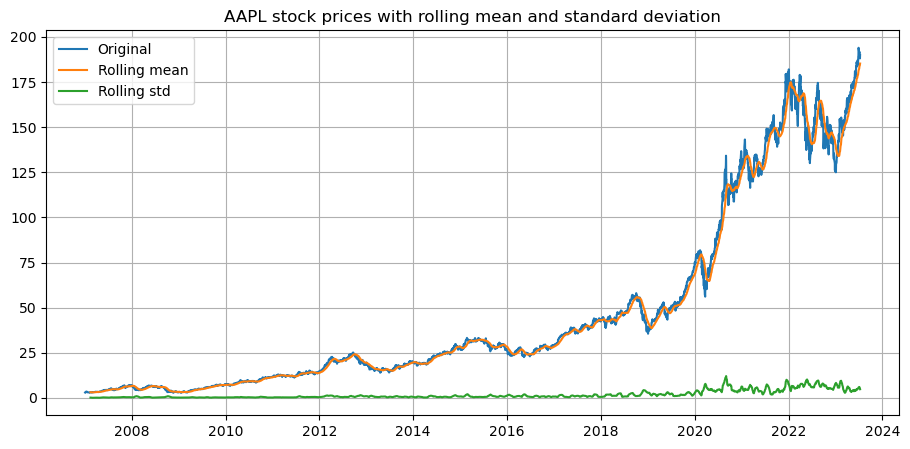

In [19]:
# 30-day rolling mean
rolling_mean = df['close'].rolling(window=30).mean() 
# 30-day rolling standard deviation
rolling_std = df['close'].rolling(window=30).std() 

plt.figure(figsize=(11, 5))
plt.plot(df['close'], label='Original')
plt.plot(rolling_mean, label='Rolling mean')
plt.plot(rolling_std, label='Rolling std')
plt.title('AAPL stock prices with rolling mean and standard deviation')
plt.grid(True)
plt.legend()
plt.show()

## Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.

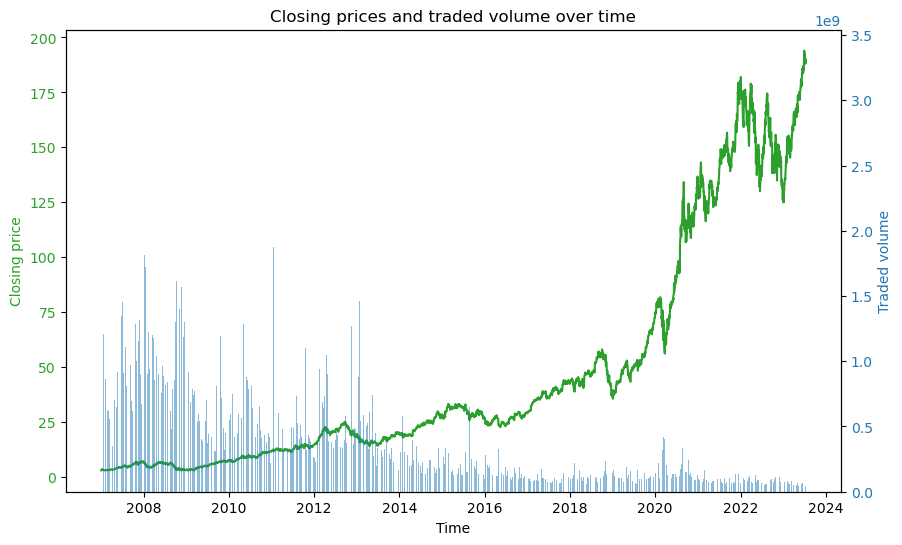

In [16]:
# Plotting Closing Prices and Traded Volume
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:green'
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing price', color=color)
ax1.plot(df.index, df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Traded volume', color=color)
ax2.bar(df.index, df['volume'], alpha=0.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Closing prices and traded volume over time')
plt.show()

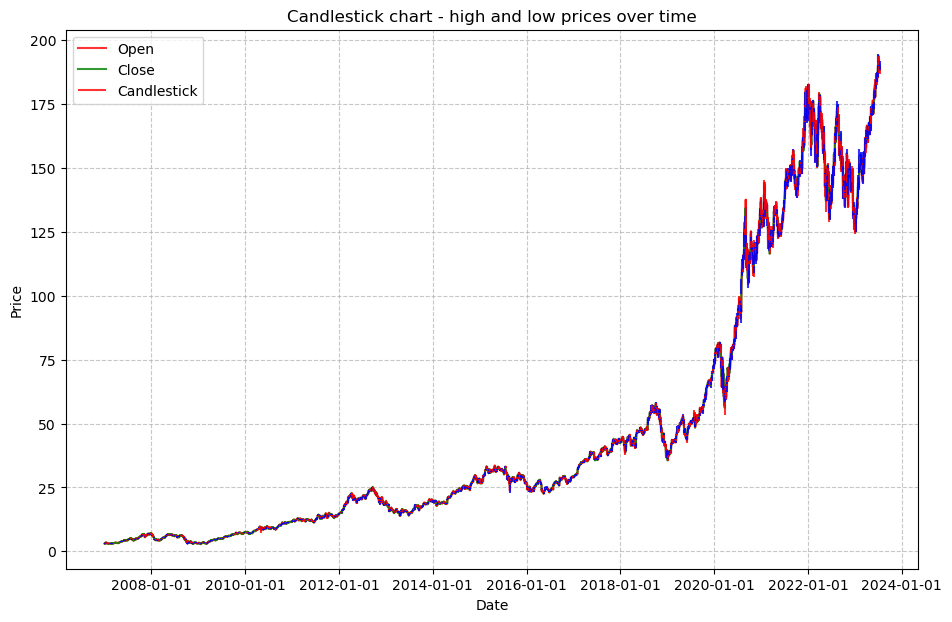

In [17]:
# Sort DataFrame by time (if not already sorted)
df = df.sort_index()

# Plotting Candlestick Chart
fig, ax = plt.subplots(figsize=(11, 7))

ax.plot(df.index, df['open'], 'r-', label='Open', alpha=0.8)
ax.plot(df.index, df['close'], 'g-', label='Close', alpha=0.8)
ax.vlines(df.index, df['low'], df['high'], colors=['b' if o < c else 'r' for o, c in zip(df['open'], df['close'])], alpha=0.8, label='Candlestick')
ax.grid(True, linestyle='--', alpha=0.7)
# Formatting
ax.xaxis_date()
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y-%m-%d'))
ax.legend()
plt.title('Candlestick chart - high and low prices over time'
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- There has been an upward trend in closing prices since the first dates that are in the dataset (since January 2007). The sharp rise in prices started in 2019. At the end of 2013, at the beginning of 2016, at the beginning of 2019, at the beginning of 2020, at the end of 2022 and in the middle of 2023, small drops in this indicator are noticeable. 
- The 30-day rolling standard deviation was almost the same, but started to rise from 2020 as well.
- At the same time, during the period when prices were lower, sales volume was higher by several times - until 2013. Then the volume began to gradually decrease. There was one burst of volume increase - in 2020. But after that, the volume continued to decline.
- The opening and closing prices generally fluctuate in the same interval over the entire period that is in the dataset.

## Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.

In [20]:
df['close'].describe()

count    4159.000000
mean       46.396058
std        50.293482
min         2.792900
25%        11.947150
50%        25.825000
75%        52.231250
max       193.970000
Name: close, dtype: float64

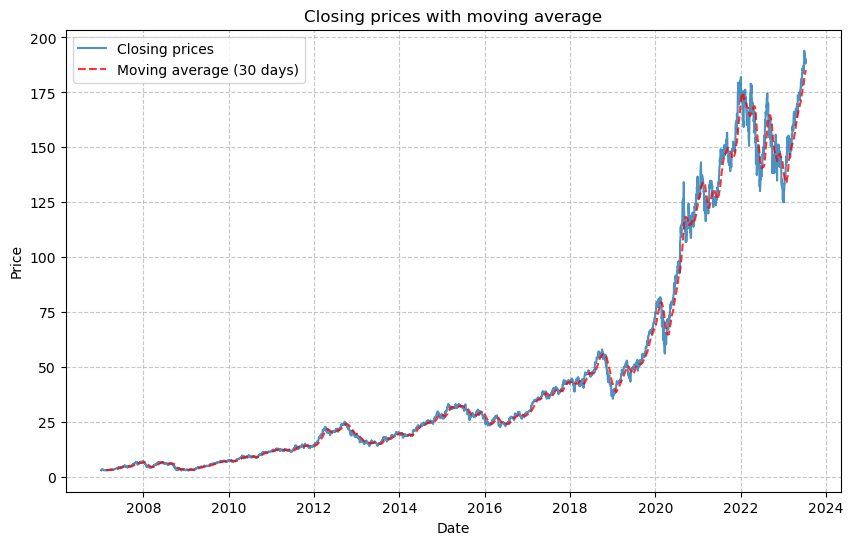

In [22]:
# Analyze closing prices with a moving average
window_size = 30
df['moving_average'] = df['close'].rolling(window=window_size).mean()

# Plotting closing prices with moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Closing prices', alpha=0.8)
plt.plot(df.index, df['moving_average'], label=f'Moving average ({window_size} days)', color='red', linestyle='--', alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Closing prices with moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.

T-Test results for average closing prices across different years:
Year 2007: T-statistic = -53.33899985495689, p-value = 0.0
Year 2008: T-statistic = -52.74769398264944, p-value = 0.0
Year 2009: T-statistic = -52.430136251347164, p-value = 0.0
Year 2010: T-statistic = -47.32220886538994, p-value = 0.0
Year 2011: T-statistic = -42.710571479712186, p-value = 0.0
Year 2012: T-statistic = -32.514534364482664, p-value = 6.75986035802269e-208
Year 2013: T-statistic = -37.54237863626461, p-value = 7.086077169396253e-267
Year 2014: T-statistic = -28.889998060564352, p-value = 3.393189764351318e-168
Year 2015: T-statistic = -20.77327194675577, p-value = 1.9531846848684098e-91
Year 2016: T-statistic = -25.665657708574162, p-value = 2.5066496174002886e-135
Year 2017: T-statistic = -10.780512412898823, p-value = 9.225869983924424e-27
Year 2018: T-statistic = 1.0140741406385827, p-value = 0.3106116956657425
Year 2019: T-statistic = 5.949533356972202, p-value = 3.2030532648819733e-09
Year 2020: T-st

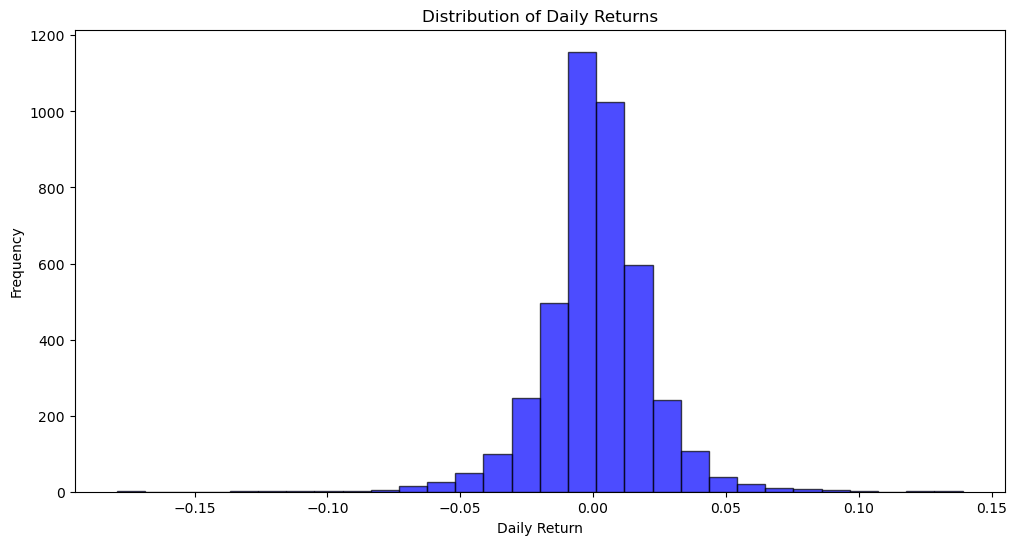

In [27]:
# Extract the year from the index
df['year'] = df.index.year

# Perform a t-test to compare average closing prices across different years
years = df['year'].unique()
t_test_results = {}

for year in years:
    subset = df[df['year'] == year]['close']
    t_stat, p_value = stats.ttest_ind(subset, df['close'], equal_var=False)
    t_test_results[year] = {'t_stat': t_stat, 'p_value': p_value}

# Print t-test results
print("T-Test results for average closing prices across different years:")
for year, result in t_test_results.items():
    print(f"Year {year}: T-statistic = {result['t_stat']}, p-value = {result['p_value']}")

# Examination daily returns' distribution and test for normality
df['daily_return'] = df['close'].pct_change().dropna()

# Plotting the histogram of daily returns
plt.figure(figsize=(12, 6))
plt.hist(df['daily_return'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Test for normality using Shapiro-Wilk test
df = df.dropna(subset=['daily_return'])

# Perform Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df['daily_return'])

print(f"Shapiro-Wilk test for normality: statistic = {stat}, p-value = {p_value}")

# Check for significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis of normality is rejected.")
else:
    print("There is not enough evidence to reject the null hypothesis of normality.")

Shapiro-Wilk test for normality: statistic = 0.9406672716140747, p-value = 6.185059009108278e-38
The null hypothesis of normality is rejected.


<div style="border:solid green 2px; padding: 20px">
    
- The t-test results indicate that the average closing prices across different years are significantly different for most years, as evidenced by the very low p-values (close to zero). However, it's important to note that for some years, particularly in the later years (e.g., 2018), the p-value is higher, indicating less evidence against the null hypothesis of equal means.
- Years with p-value close to 0 (Rejecting the Null Hypothesis):
Years 2007 to 2017 and 2020 to 2023 have p-values close to zero, indicating strong evidence to reject the null hypothesis that the average closing prices are the same across different years.
Years with higher p-values (Less Evidence Against Null Hypothesis):
Year 2018 has a p-value of 0.3047, suggesting less evidence against the null hypothesis. This could imply that in 2018, the average closing prices may not be significantly different from other years in the dataset.
- The Shapiro-Wilk test assesses whether a sample comes from a normally distributed population. The null hypothesis of the test is that the data follows a normal distribution.
In this case, the extremely low p-value (much smaller than commonly used significance levels like 0.05) indicates that enough evidence to reject the null hypothesis of normality. Therefore, based on this test, the 'daily_return' data is not normally distributed.

## Advanced Statistical Techniques (Bonus)
Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.

Correlation matrix:


array([[ 1.        , -0.51731482,  0.99977903,  0.99989493,  0.99989829],
       [-0.51731482,  1.        , -0.51716004, -0.51615506, -0.51849553],
       [ 0.99977903, -0.51716004,  1.        ,  0.99991263,  0.99989446],
       [ 0.99989493, -0.51615506,  0.99991263,  1.        ,  0.99987309],
       [ 0.99989829, -0.51849553,  0.99989446,  0.99987309,  1.        ]])

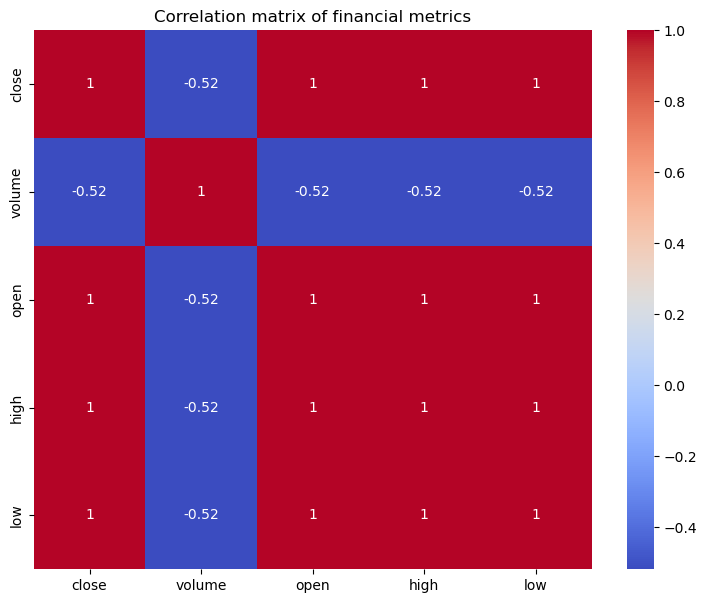

In [30]:
selected_columns = ['close', 'volume', 'open', 'high', 'low']

# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(subset_df, rowvar=False)

print("Correlation matrix:")
display(correlation_matrix)

# Plot a heatmap for better visualization
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=selected_columns, yticklabels=selected_columns)
plt.title('Correlation matrix of financial metrics')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- The correlation between 'volume' and other columns is approximately -0.5173, indicating a moderate negative correlation. It indicating a tendency for higher volumes to be associated with lower values of other metrics.
- The metrics 'open', 'high', 'close' and 'low' exhibit very high positive correlations with each other (close to 1). This suggests that these metrics move almost in perfect sync with the closing prices.

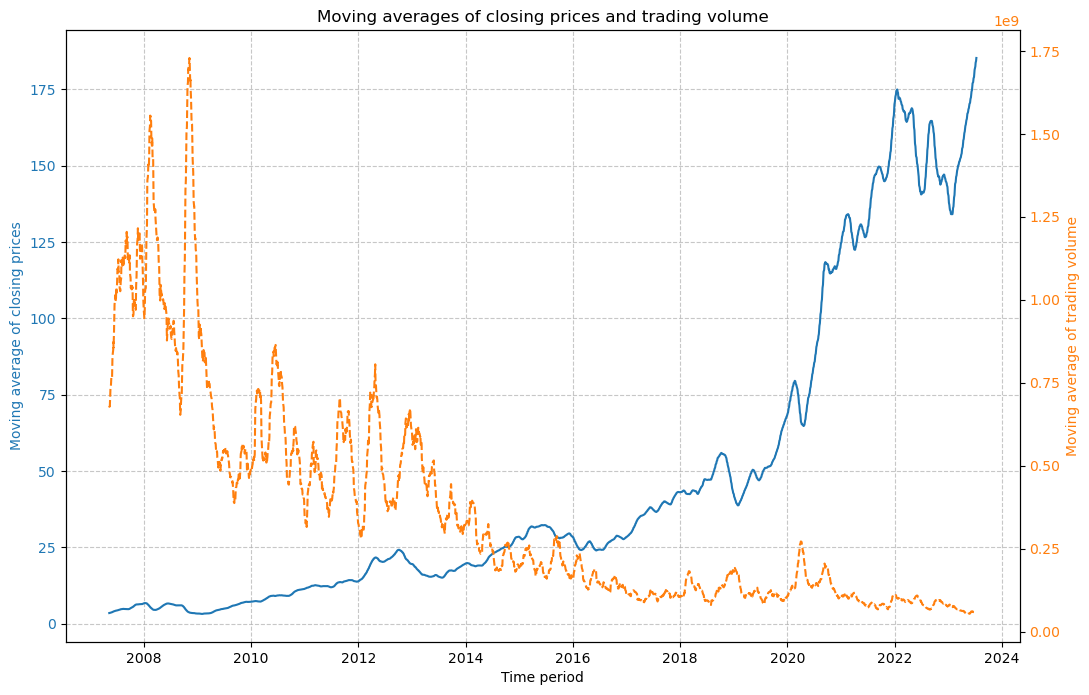

In [38]:
df['moving_average_close'] = df['close'].rolling(window=window_size).mean()
df['moving_average_volume'] = df['volume'].rolling(window=window_size).mean()

# Drop NaN values introduced by the rolling mean calculation
df = df.dropna()

# Plot the moving averages and trading volume
fig, ax1 = plt.subplots(figsize=(11, 7))

color = 'tab:blue'
ax1.set_xlabel('Time period')
ax1.set_ylabel('Moving average of closing prices', color=color)
ax1.plot(df['moving_average_close'], label='Moving average of closing prices', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Moving average of trading volume', color=color)
ax2.plot(df['moving_average_volume'], label='Moving average of trading volume', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

fig.tight_layout()
plt.title('Moving averages of closing prices and trading volume')
plt.show()

In [39]:
# Calculate the correlation between moving averages of closing prices and trading volume
correlation_matrix = np.corrcoef(df['moving_average_close'], df['moving_average_volume'])

correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation between moving averages of closing prices and trading volume: {correlation_coefficient}")

Correlation between moving averages of closing prices and trading volume: -0.5762047969730868


<div style="border:solid green 2px; padding: 20px">
    The negative sign indicates a negative correlation between the two variables. As one variable increases, the other tends to decrease, and vice versa.
The magnitude of the correlation coefficient (-0.5762) suggests a moderate negative correlation. It's not close to -1, which would indicate a strong negative correlation, but it's still substantial.
A negative correlation between the moving averages of closing prices and trading volume might suggest that, on average, as the closing prices increase, the trading volume tends to decrease, and vice versa. This could imply a potential inverse relationship between price movements and trading activity.

## Summary and insights

<div style="border:solid green 2px; padding: 20px">
    
- The dataset represents daily stock data for AAPL from 2007 to 2023. Time series analysis revealed a noticeable frequency in the data, which indicates a fairly uniform time interval between observations.
- Descriptive statistics provided key insights into the distribution of stock-related metrics such as volume, VWAP, open, close, high, low prices, and the number of transactions. It revealed that in each column, the values fluctuate a lot and there is a very large spread from minimum to maximum value.
- Moving averages were employed to smooth out fluctuations and trends in closing prices and trading volume.
The correlation analysis between the moving averages of closing prices and trading volume revealed a moderate negative correlation (-0.5762). This implies that, on average, as closing prices increase, trading volume tends to decrease, and vice versa.
- Matplotlib and Seaborn were utilized to visually represent closing prices, trading volume, and their respective moving averages over time.
- A t-test was conducted to compare average closing prices across different years.
Results showed significant differences in average closing prices between years, with p-values approaching zero for several years. The Shapiro-Wilk test for normality was applied to daily returns, indicating a rejection of the null hypothesis of normality.
- NumPy's statistical functions were employed to calculate the correlation matrix for various financial metrics.
The matrix provided insights into pairwise correlations, emphasizing strong positive correlations between closing prices, and high, low, and open prices. The correlation between moving averages of closing prices and trading volume was explored, revealing a moderate negative relationship.
- The negative correlation between closing prices and trading volume suggests a potential inverse relationship, emphasizing the need for further investigation.
- In summary, the advanced statistical analysis on the AAPL stock data provided nuanced insights into the dynamics of financial metrics over time. The combination of descriptive statistics, visualizations, and advanced statistical techniques contributes to a comprehensive understanding of the dataset, enabling informed decision-making in the context of financial markets.